This report aims at understanding and applying **Hypothesis testing** methods such as <br>
1.  **Normal Distribution**<br>
2. **Student t Distribution**<br>
3. **ANOVA**<br>

Some **Machine learning** tecniques such as <br>
1. **Random Forests** <br>
2. **Linear Regressor**<br>
are also used to do **predictive analysis** 


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [2]:
payroll = pd.read_csv("C:\DCU\Statistical_Data_Analysis\Mini_Project/data.csv")

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Data Cleansing**

In [3]:
payroll = payroll[pd.notnull(payroll['Payroll Department'])]
payroll.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
payroll.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
payroll.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [4]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    payroll[i] = payroll[i].str.replace('$','')

**Outlier removal**

In [5]:
payroll = payroll[payroll.Annual_sal != 0]  
payroll = payroll[payroll.Base_Pay != 0]
payroll.Annual_sal = payroll.Annual_sal.astype(float)
payroll.Base_Pay = payroll.Base_Pay.astype(float)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


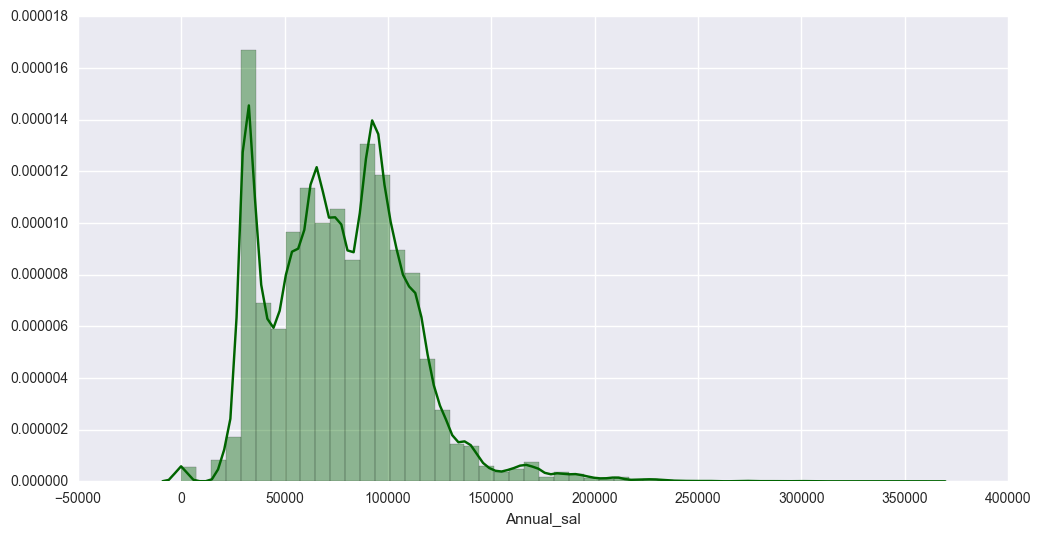

In [6]:
plt.figure(figsize = (12,6))
sns.distplot(payroll.Annual_sal,color = 'darkgreen')

**Creating different Sample  from the population**

In [7]:
payroll_2015 = payroll[payroll.Year ==2015]
payroll_2016 = payroll[payroll.Year ==2016]

**Calculating the Population Parameters**

In [8]:
pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015.Annual_sal)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 76046.39152505301
Population Standard Deviation: 34232.25489729045


**Calculating the Sample Parameters**

In [9]:
print("Population Mean: "+str(payroll_2016['Annual_sal'].mean()))
payroll_2016_sample = payroll_2016.sample(frac=0.10)
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
print("Sample Mean: "+str(sample_mean_2016))
sample_std_2016 = statistics.stdev(payroll_2016_sample.Annual_sal)
print("Sample Standard Deviation: "+str(sample_std_2016))

Population Mean: 78711.19987225177
Sample Mean: 78615.98203978912
Sample Standard Deviation: 33969.456992467625


**Hypothesis Testing**

<b>Normal distribution</b><br><br>
<b>Null Hypothesis</b> : Pay does not increase in 2016<br>
<b>Alternate Hypothesis</b>: It increases<br>
<b>Population parameters</b>: Mean = pop_mean_2015, standard deviation = pop_std_2015<br>
<b>Sample parameters</b> :   Mean = sample_mean_2016, standard deviation = sample_std_2016<br>

In [10]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65 
# Calculate the test statistics 
zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(8916))/sample_std_2016
print(zscore_test_stat)

7.142666053800595


<b>Conclusion</b>: As the test statistics fall into the rejection region the null hypothesis is rejected<br>
and it can be concluded that the Annual salaries increase in 2016.<br>
However, we will first check for the <b>Type 1</b> and <b>Type 2 </b>Errors

**Type 1 type 2 hypothesis error**<br>
In statistical hypothesis testing, a type I error is the incorrect rejection of a true null hypothesis (a "false positive"), while a type II error is incorrectly retaining a false null hypothesis (a "false negative").

In [11]:
# we are basically checking the true value of the population characteristics
pop_mean_2016 = payroll_2016['Annual_sal'].mean()
pop_std_2016 = statistics.stdev(payroll_2016.Annual_sal)

zscore_error = ((pop_mean_2016 - pop_mean_2015)/pop_std_2016)
print(zscore_error)

0.07937359898019851


We can clearly see that we encountered a Type 1 error as the population mean is well within acceptable region

**Student T-distribution**<br>
**Null Hypothesis**: pay does not increase in 2016<br>
**Alternate Hypothesis**: it increases<br>
**Population parameters**: Mean = pop_mean_2015, standard deviation = pop_std_2015<br>
**Sample parameters** : Mean = sample_mean_2016, standard deviation = sample_std_2016<br>

In [12]:
#Calculating the Sample Parameters**
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2015 = payroll[payroll.Year ==2015]
# Creating Sample distribution for T statistics
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)

In [13]:
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)
N = len(payroll_t_2015_sample)
sample_mean_2015 = payroll_t_2015_sample['Annual_sal'].mean()
sample_std_2015 = statistics.stdev(payroll_t_2015_sample.Annual_sal)
pop_std_2014  = statistics.stdev(payroll_2014.Annual_sal)
pop_mean_2014 = payroll_2014['Annual_sal'].mean()

In [14]:
# Confidence Level 95 %  for one sided T curve
t_critical = 1.311

# Calculate the test statistics 
tscore_test_stat = ((sample_mean_2015 - pop_mean_2014)*math.sqrt(N))/sample_std_2015

print(tscore_test_stat)

1.3523916022924236


Based on the Test score , we can Reject the Null

**** F Distribution and ANOVA**

The means from three different samples are compared using ANOVA<br>
It is similar to applying t-tests over multiple sample
ANOVA : https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php

In [15]:
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2014_elec = payroll_2014[payroll_2014.Job_title == 'Electrician']
payroll_2015_elec = payroll_2015[payroll_2015.Job_title == 'Electrician']
payroll_2016_elec = payroll_2016[payroll_2016.Job_title == 'Electrician']
sample_elec_2014 = payroll_2014_elec.sample(frac=0.47)
sample_elec_mean_2014 = sample_elec_2014['Base_Pay'].mean()
print("Sample Mean 2014 "+str(sample_elec_mean_2014))
sample_elec_2015 = payroll_2015_elec.sample(frac=0.41)
sample_elec_mean_2015 = sample_elec_2015['Base_Pay'].mean()
print("Sample Mean 2015 "+str(sample_elec_mean_2015))
sample_elec_2016 = payroll_2016_elec.sample(frac=0.22)
sample_elec_mean_2016 = sample_elec_2016['Base_Pay'].mean()
print("Sample Mean 2016 "+str(sample_elec_mean_2016))
# Creating the Samples of the base pays over three years
sam_1 = sample_elec_2014.Base_Pay
sam_2 = sample_elec_2015.Base_Pay
sam_3 = sample_elec_2016.Base_Pay

Sample Mean 2014 69452.61085714286
Sample Mean 2015 70112.05971428572
Sample Mean 2016 35876.52914285714


**Calculating the test statistics**

In [16]:
f, p = stats.f_oneway(sam_1, sam_2, sam_3 )
print ('F value:', f)
print ('P value:', p, '\n')

F value: 27.6485913383
P value: 2.54589571359e-10 



P value is very low, hence null hypothesis is rejected

**Predictive Analysis using Machine Learning**

In [17]:
# Transform the qualitative data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words = 'english')
dtm = vect.fit_transform(payroll.Job_title)

**Split the data into training and testing datasets**

In [18]:
from sklearn.cross_validation import train_test_split

X = dtm
y = payroll.Annual_sal

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

<b>Random Forest Regressor</b> : It is a form of ensemble learning, it uses many randomized decision trees to<br>
predict the outcome, hence the name.

<b>Regression</b> is used to predict continous variables whereas <b>Classification</b> is used for predicting<br>
discrete values

In [19]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print('Root mean Score Training: {}'.format(r2_score(y_train, pred_train)))
print('Root mean Score Testing: {}'.format(r2_score(y_test, pred_test)))

Root mean Score Training: 0.9599435923648764
Root mean Score Testing: 0.9582224379166616


**Visualization for training and testing data prediction accuracy**

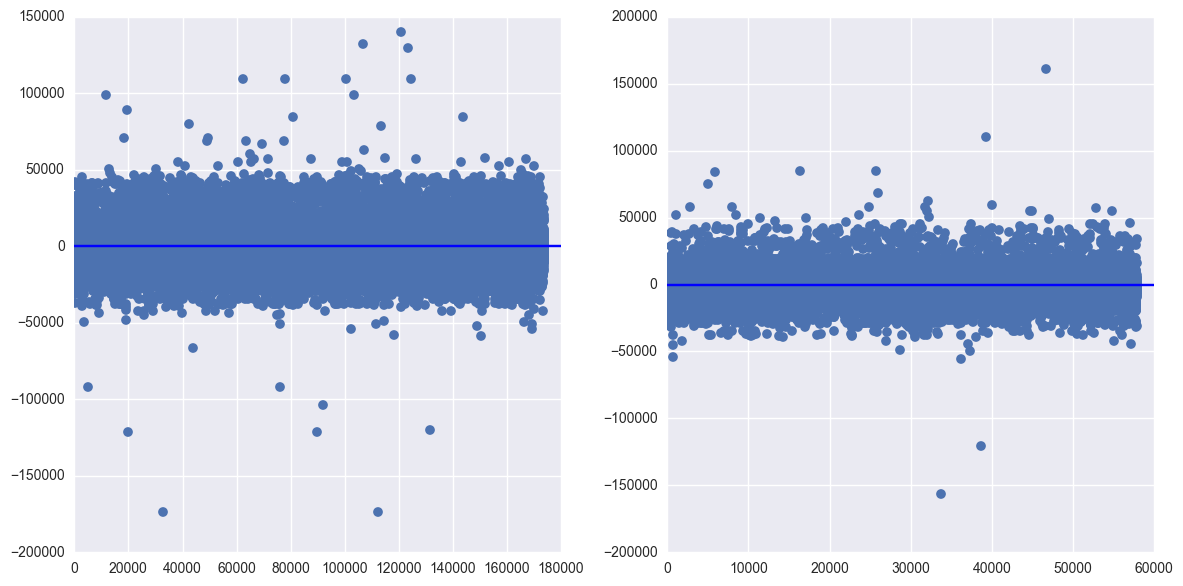

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(pred_train)), y_train - pred_train,'o')
plt.axhline(0)
plt.subplot(1,2,2)
plt.plot(np.arange(len(pred_test)), y_test - pred_test,'o')
plt.axhline(0)
plt.tight_layout()

**Linear Regression**

In [22]:
# Selecting the features and creating train test split
y = payroll["Average Benefit Cost"]
X = payroll[['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

**Training the model**

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

3172.16529806


In [24]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
print(ranked_suburbs)

             Coefficient
Q1 Payments     0.166515
Q4 Payments     0.048980
Q2 Payments     0.033085
Annual_sal      0.032699
Q3 Payments    -0.031463


**The coefficient suggests that it has a poor coorelation with the target, hence a poor model is expected**

In [25]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
print('Root mean Score Training: {}'.format(r2_score(y_train, pred_train)))
print('Root mean Score Testing: {}'.format(r2_score(y_test, pred_test)))

Root mean Score Training: 0.519360033514233
Root mean Score Testing: 0.5167314257055403


**Processing for creating Best Fit Line**

In [26]:
new = pd.Series(list(y_test)).values
new_list =[]
for i in range(len(new)):
    new_list.insert(i,new[i])
new_list = [float(q) for q in new_list]
new_list = [round(q) for q in new_list]
pred_test = [float(q) for q in pred_test]
pred_test = [round(q) for q in pred_test]

In [27]:
# Logic for finding the line of best split
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer/denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return(a,b)

In [28]:
a, b = best_fit(new_list, pred_test)

best fit line:
y = 4666.45 + 0.52x


**Visualizing the Best fit line**

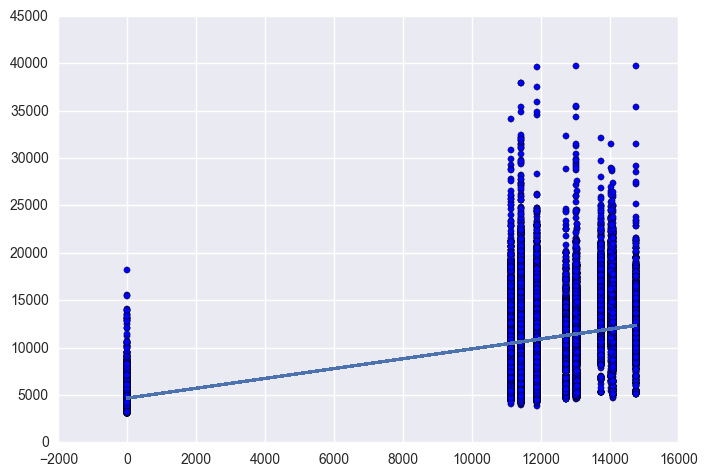

In [29]:
plt.scatter(new_list, pred_test)
yfit = [a + b * xi for xi in new_list]
plt.plot(new_list, yfit)